In [1]:
# Giovanna Gorski
# Email: ---# Aunalytics Data Science Assignment - Problem 1 (Income Prediction)
# files: au_train.csv, au_test.csv

In [ ]:
import pandas as pd

au_train = pd.read_csv("au_train.csv")
au_test = pd.read_csv("au_test.csv")
dataset = pd.concat([au_train, au_test])

In [2]:
dataset.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
# Checking for missing values.

dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [4]:
dataset.isin([" ?"]).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [5]:
# Removing missing '?' values.
dataset = dataset.replace([" ?","NaN"])

In [6]:
dataset = dataset.dropna()

In [7]:
#dataset.isin([" ?"]).sum()
#dataset.head(3)

In [8]:

# One-hot encoding everything important.

# Reference: <=50K and <50K : 0 ; >50K = 1
dataset["class"] = dataset["class"].map({" <=50K.":0," <50K.":0," >50K.":1,
                                         " <=50K":0," <50K":0," >50K":1})

# Reference: Male: 0, Female: 1
dataset["sex"] = dataset["sex"].map({" Female":1, " Male":0})

# Reference: Never-married,Divorced,Separated, Widowed,Single: 0 
#           Married-civ-spouse,Married-spouse-absent,Married-AF-spouse,Married: 1
dataset["marital-status"] = dataset["marital-status"].map({" Never-married": 0," Divorced": 0," Separated":0, 
                                                           " Widowed":0,"Single": 0, " Married-civ-spouse": 1,
                                                           " Married-spouse-absent": 1, " Married-AF-spouse":1,
                                                           " Married": 1})

# Education is redundant to education-num therefore drop it.
dataset.drop(labels = ["education"], axis = 1, inplace = True)

# Preprocessing other complex categorical features.
from sklearn.preprocessing import OrdinalEncoder

dataset["race"] = OrdinalEncoder().fit_transform(dataset[["race"]])
dataset["workclass"] = OrdinalEncoder().fit_transform(dataset[["workclass"]])
dataset["occupation"] = OrdinalEncoder().fit_transform(dataset[["occupation"]])
dataset["native-country"] = OrdinalEncoder().fit_transform(dataset[["native-country"]])
dataset["relationship"] = OrdinalEncoder().fit_transform(dataset[["relationship"]])


In [9]:
dataset.head(3)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,6.0,77516,13,0,0.0,1.0,4.0,0,2174,0,40,38.0,0
1,50,5.0,83311,13,1,3.0,0.0,4.0,0,0,0,13,38.0,0
2,38,3.0,215646,9,0,5.0,1.0,4.0,0,0,0,40,38.0,0


In [10]:
#dataset.shape

In [11]:
#dataset.astype(int)

In [12]:
#dataset.head(4)

Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      9292
           1       0.63      0.28      0.39      2919

    accuracy                           0.79     12211
   macro avg       0.72      0.62      0.63     12211
weighted avg       0.77      0.79      0.76     12211

 Model Accuracy: 78.91246
 Confusion Matrix: 
[[8812  480]
 [2095  824]]

K-Nearest neighbor

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      9292
           1       0.55      0.33      0.41      2919

    accuracy                           0.77     12211
   macro avg       0.68      0.62      0.64     12211
weighted avg       0.75      0.77      0.75     12211

 Model Accuracy: 77.49570
 Confusion Matrix: 
[[8493  799]
 [1949  970]]

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      9292
           1       0.5

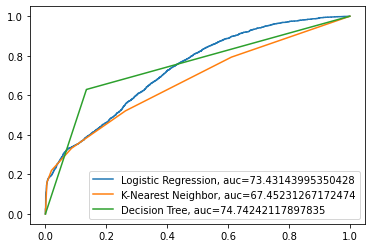

In [37]:
# Predicting.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

X = dataset.drop(labels = ['class'], axis = 1)
y = dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

print("Logistic Regression\n")
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(" Model Accuracy: %.5f" % (100*accuracy_score(y_test, y_pred)))
print(" Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)*100
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))

print("\nK-Nearest neighbor\n")
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(" Model Accuracy: %.5f" % (100*accuracy_score(y_test, y_pred)))
print(" Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)*100
plt.plot(fpr,tpr,label="K-Nearest Neighbor, auc="+str(auc))

print("\nDecision Tree Classifier\n")
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(" Model Accuracy: %.5f" % (100*accuracy_score(y_test, y_pred)))
print(" Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)*100
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))
plt.legend()
plt.show()